### 2.4 Fundamentals of Visualisation - Seaborn

In [2]:
# Import Libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [19]:
# Import Data

df = pd.read_csv('nycbike_clean.csv', index_col = 0)

/var/folders/8k/dxgtncgd49g2ryx410bsc12r0000gn/T/ipykernel_61143/425896445.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nycbike_clean.csv', index_col = 0)


In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,trips_per_day,_merge
0,F2147CAB2E003A12,classic_bike,2022-01-01 00:56:36,2022-01-01 01:06:55,Cedar St & Evergreen Ave,4721.01,Willoughby Ave & Tompkins Ave,4665.02,40.696710,-73.928070,40.694254,-73.946269,member,2022-01-01,11.6,20895,both
1,27FF7FCE0F8A02DF,classic_bike,2022-01-01 15:42:26,2022-01-01 16:02:59,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013247,40.716021,-73.999744,casual,2022-01-01,11.6,20895,both
2,E413BC1D0B4C6031,classic_bike,2022-01-01 15:37:55,2022-01-01 16:03:05,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013247,40.716021,-73.999744,casual,2022-01-01,11.6,20895,both
3,1967ADD90811CE78,electric_bike,2022-01-01 17:35:23,2022-01-01 17:46:05,Cabrini Blvd & W 177 St,8358.1,Broadway & W 220 St,8715.01,40.848282,-73.941343,40.872412,-73.912807,member,2022-01-01,11.6,20895,both
4,D199C729356BA836,classic_bike,2022-01-01 19:25:20,2022-01-01 19:41:53,5 Ave & E 72 St,7100.07,W 41 St & 8 Ave,6602.03,40.772828,-73.966853,40.756405,-73.990026,casual,2022-01-01,11.6,20895,both


#### Setting a theme for the visualisation

In [27]:
sns.set_theme(style="dark")
custom_palette = sns.color_palette("GnBu_r")

#### Create a bar chart of the top 20 starting stations

In [20]:
df['value'] = 1

In [21]:
# Count the starting stations occurence

df_station = df.groupby('start_station_name')['value'].count().reset_index()

In [22]:
df_station

,start_station_name,value
0,1 Ave & E 110 St,22087
1,1 Ave & E 16 St,68964
2,1 Ave & E 18 St,72517
3,1 Ave & E 30 St,46499
4,1 Ave & E 39 St,53858
...,...,...
1756,Wyckoff Ave & Gates Ave,16815
1757,Wyckoff St & 3 Ave,253
1758,Wyckoff St & Nevins St,11686
1759,Wythe Ave & Metropolitan Ave,67413


In [23]:
# Create a data for the top20 stations

top20 = df_station.nlargest(20, 'value')

In [24]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,131131
1718,West St & Chambers St,125281
495,Broadway & W 58 St,116372
286,6 Ave & W 33 St,108800
8,1 Ave & E 68 St,107899
461,Broadway & E 14 St,100480
485,Broadway & W 25 St,100099
1511,University Pl & E 14 St,99510
463,Broadway & E 21 St,97416
1603,W 31 St & 7 Ave,95534


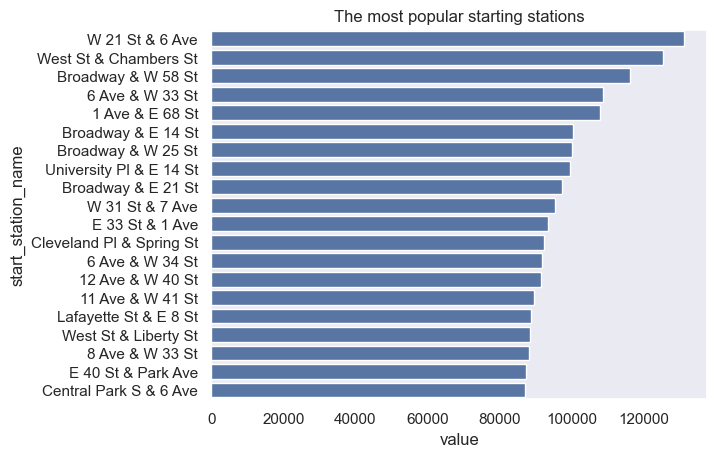

In [25]:
#Create bar chart of the top20 station

sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("The most popular starting stations")
plt.show()

##### The colour palette chosen in the beginning of the step did not work for this plot, so I will be reassigning colour palette for this plot.

/var/folders/8k/dxgtncgd49g2ryx410bsc12r0000gn/T/ipykernel_61143/3415488100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name',palette = "GnBu_r")


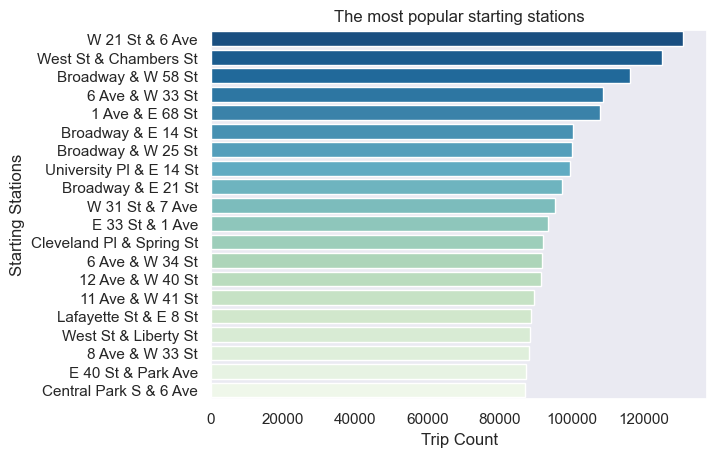

In [26]:
# Create bar chart of the top20 station with new palette

sns.barplot(data = top20, x = 'value', y = 'start_station_name',palette = "GnBu_r")
plt.title("The most popular starting stations")
plt.xlabel('Trip Count')
plt.ylabel('Starting Stations')
plt.show()

#### Re-create the dual axis line plot from previous exercise using seaborn

In [28]:
df_temp = df.set_index('date')

In [29]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,trips_per_day,trip_duration,value
date,,,,,,,,,,,,,,,,,
2022-01-01,F2147CAB2E003A12,classic_bike,2022-01-01 00:56:36,2022-01-01 01:06:55,Cedar St & Evergreen Ave,4721.01,Willoughby Ave & Tompkins Ave,4665.02,40.696710,-73.928070,40.694254,-73.946269,member,11.6,20895,10.316667,1
2022-01-01,27FF7FCE0F8A02DF,classic_bike,2022-01-01 15:42:26,2022-01-01 16:02:59,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013247,40.716021,-73.999744,casual,11.6,20895,20.550000,1
2022-01-01,E413BC1D0B4C6031,classic_bike,2022-01-01 15:37:55,2022-01-01 16:03:05,Albany St & Greenwich St,5145.02,Bayard St & Baxter St,5351.03,40.709267,-74.013247,40.716021,-73.999744,casual,11.6,20895,25.166667,1
2022-01-01,1967ADD90811CE78,electric_bike,2022-01-01 17:35:23,2022-01-01 17:46:05,Cabrini Blvd & W 177 St,8358.1,Broadway & W 220 St,8715.01,40.848282,-73.941343,40.872412,-73.912807,member,11.6,20895,10.700000,1
2022-01-01,D199C729356BA836,classic_bike,2022-01-01 19:25:20,2022-01-01 19:41:53,5 Ave & E 72 St,7100.07,W 41 St & 8 Ave,6602.03,40.772828,-73.966853,40.756405,-73.990026,casual,11.6,20895,16.550000,1


In [30]:
df_temp = df_temp.sort_values(by='date')

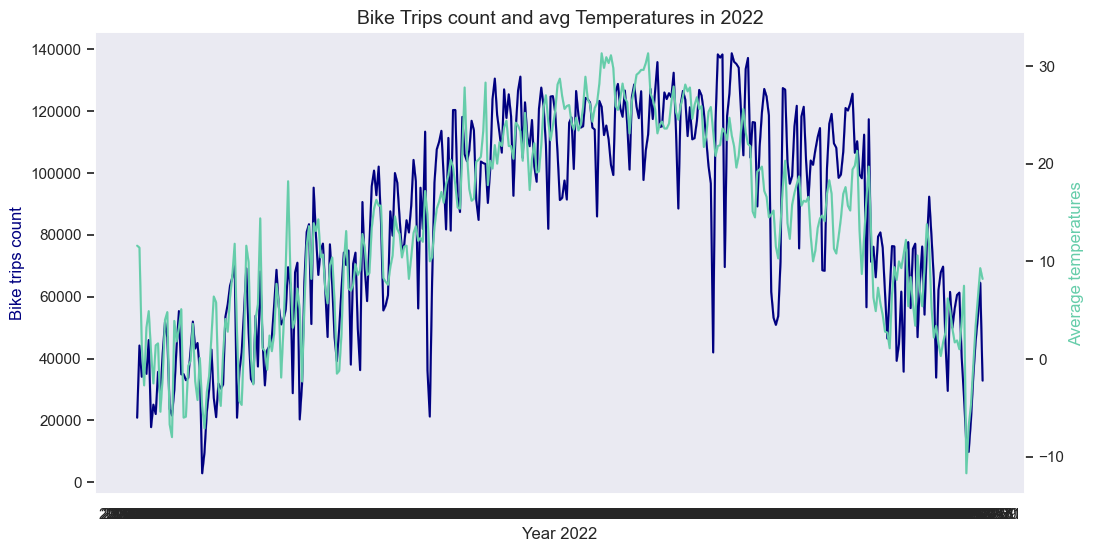

In [31]:
# Create dual axis line chart for bike trip counts and average temperature

fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = df_temp['trips_per_day'], color = "navy")
ax.set_xlabel("Year 2022", fontsize = 12) # set x-axis label
ax.set_ylabel("Bike trips count",color = "navy", fontsize = 12) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="mediumaquamarine", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "mediumaquamarine",fontsize=12)
plt.title('Bike Trips count and avg Temperatures in 2022', fontsize = 14)
plt.show()

#### Create box plot of one of the categorical variables in the dataset

In [38]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
trips_per_day           int64
value                   int64
dtype: object

In [32]:
# Convert 'started_at' and 'ended_at' to datetime

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [33]:
# Calculate the trip duration in minutes

df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

/var/folders/8k/dxgtncgd49g2ryx410bsc12r0000gn/T/ipykernel_61143/1485416455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='member_casual', y='trip_duration', data=df, palette = custom_palette)
/var/folders/8k/dxgtncgd49g2ryx410bsc12r0000gn/T/ipykernel_61143/1485416455.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='member_casual', y='trip_duration', data=df, palette = custom_palette)


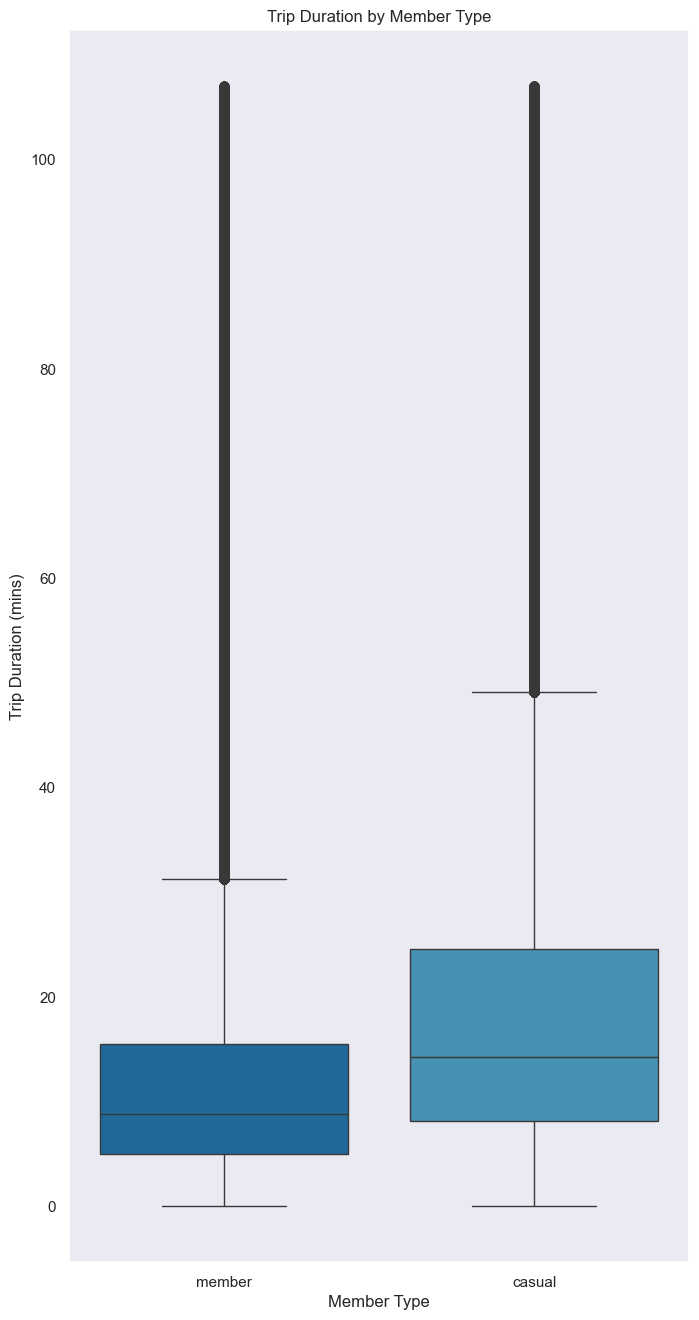

In [36]:
# Create a box plot

plt.figure(figsize=(8, 16))
sns.boxplot(x='member_casual', y='trip_duration', data=df, palette = custom_palette)
plt.title('Trip Duration by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Trip Duration (mins)')
plt.show()

In [35]:
df['member_casual'].value_counts()

member_casual
member    23886142
casual     6572211
Name: count, dtype: int64

##### Based on the box plots above we can see that there is quite a difference in the trip duration distribution between the 2 different types of customers that we have. Casual based customer seems to have a wider range of outliers, meaning their trips are more varied to short and longer time period. While, the member customers seems to have more regular period. In general, casual customers are using the bike longer than most of the Citi Bike membership customer, who generally uses the bike in less than 20 minutes.

#### Create a FacetGrid

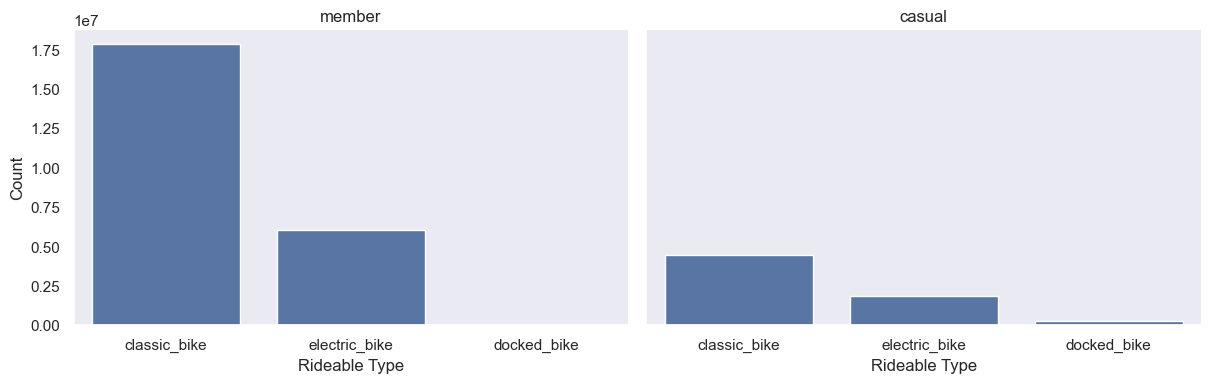

In [37]:
# Create the FacetGrid with the  data
grid = sns.FacetGrid(df, col="member_casual", col_wrap=3, height=4, aspect=1.5, palette = custom_palette)
grid.map_dataframe(sns.countplot, x="rideable_type", order=df['rideable_type'].value_counts().index)

grid.set_axis_labels('Rideable Type', 'Count')
grid.set_titles(col_template="{col_name}")

plt.show()

##### Based on the FacetGrid above, we can see both member and casual customer of Citi Bike prefer to use the classic bike. Interestingly, some of the casual customers actually use docked bike more than the members.